IR PRACTICAL 4 :  E-mail Spam Filtering using a Text Classification algorithm

Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Step 2: Download NLTK Resources

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 3: Load the Dataset

In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encode labels as 0 and 1

print(" Dataset Loaded Successfully")

 Dataset Loaded Successfully


In [6]:
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Step 4: Text Preprocessing Function

In [7]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z]', ' ', text)  # Remove non-alphabetic chars
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_message'] = df['message'].apply(clean_text)

Step 5: Split Data into Train/Test

In [8]:
X = df['cleaned_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Vectorization (TF-IDF)

In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Step 7: Train the Naive Bayes Model

In [10]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

Step 8: Evaluate the Model

In [11]:
acc = accuracy_score(y_test, y_pred)
print("\n Model Evaluation")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Model Evaluation
Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Step 9: Plot Confusion Matrix

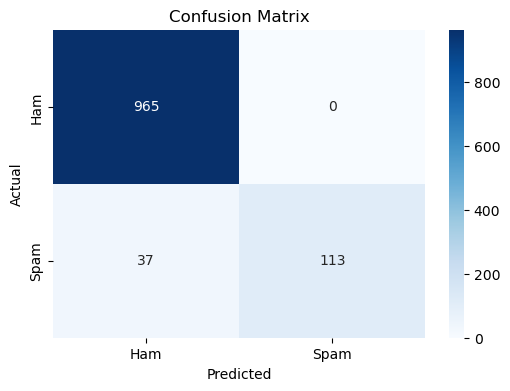

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step 10: Predict on Custom Input (Optional)

In [19]:
def predict_message(msg):
    cleaned = clean_text(msg)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)[0]
    return "Spam" if prediction == 1 else "Ham"

# Example:
custom_input = "Congratulations! You've won a free ticket to Bahamas. Text WIN to 12345."
print("\nMessage:", custom_input)
print("Prediction:", predict_message(custom_input))


Message: Congratulations! You've won a free ticket to Bahamas. Text WIN to 12345.
Prediction: Spam
